## Bias

----------------------------------------

Bias - HyperStat Online
http://davidmlane.com/hyperstat/A9257.html

A statistic is biased if, in the long run, it consistently over or underestimates the parameter it is estimating. More technically it is biased if its expected value is not equal to the parameter. A stop watch that is a little bit fast gives biased estimates of elapsed time. Bias in this sense is different from the notion of a biased sample. A statistic is positively biased if it tends to overestimate the parameter; a statistic is negatively biased if it tends to underestimate the parameter. An unbiased statistic is not necessarily an accurate statistic. If a statistic is sometimes much too high and sometimes much too low, it can still be unbiased. It would be very imprecise, however. A slightly biased statistic that systematically results in very small overestimates of a parameter could be quite efficient. 

-----------------------

https://web.microsoftstream.com/video/fbf7508f-99a2-4054-bc54-1cdca68450e8

Cognitive biases in data analytics: https://web.microsoftstream.com/video/581a9928-3899-43f4-83ef-137d7904eeaf

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss
import seaborn as sns

plt.style.use('ggplot') # R statistical style
plt.rcParams['figure.figsize'] = 14, 10

### Location and scale

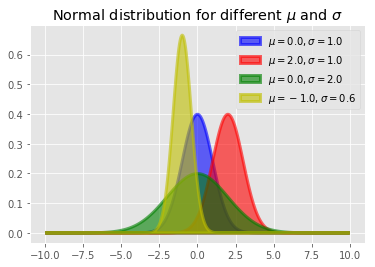

In [2]:
x = np.linspace(-10.0, 10.0, 1000)

plt.fill(x, ss.norm.pdf(x, loc= 0.0, scale=1.0), label="$\mu = 0.0, \sigma = 1.0$", c='b', alpha=0.6, lw=3.0)
plt.fill(x, ss.norm.pdf(x, loc= 2.0, scale=1.0), label="$\mu = 2.0, \sigma = 1.0$", c='r', alpha=0.6, lw=3.0)
plt.fill(x, ss.norm.pdf(x, loc= 0.0, scale=2.0), label="$\mu = 0.0, \sigma = 2.0$", c='g', alpha=0.6, lw=3.0)
plt.fill(x, ss.norm.pdf(x, loc=-1.0, scale=0.6), label="$\mu =-1.0, \sigma = 0.6$", c='y', alpha=0.6, lw=3.0)

plt.title("Normal distribution for different $\mu$ and $\sigma$")
plt.legend()

These curves represent bell shape curves. The blue and red curves go on to infinity on the x axis. All we are really interested in is the M and SD. No matter what the M and SD are, if you go out 1 SD left and right, 68.27% of the distribution scores lie here, for 2 SD its 95.45%, 3 SDs is 99.7%.

### Probability

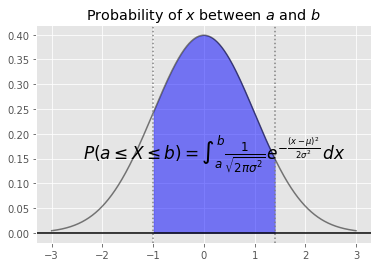

In [3]:
x = np.linspace(-3.0, 3.0, 1000)
y = ss.norm.pdf(x, loc= 0.0, scale=1.0)

xseg = x[np.logical_and(-1.0 < x,  x < 1.4)]
yseg = y[np.logical_and(-1.0 < x,  x < 1.4)]

plt.plot(x, y, color='k', alpha=0.5)
plt.fill_between(xseg, yseg, color='b', alpha=0.5)
plt.axvline(x=-1.0, color='grey', linestyle=':')
plt.axvline(x= 1.4, color='grey', linestyle=':')

plt.text(0.2, 0.15,
         r'$P (a \leq X \leq b) = \int_a^b \frac{1}{\sqrt{2\pi\sigma^2} } e^{ -\frac{(x-\mu)^2}{2\sigma^2} } \, dx$',
         horizontalalignment='center', size=17)

plt.axhline(y= 0.0, color='black', linestyle='-')

plt.title("Probability of $x$ between $a$ and $b$");

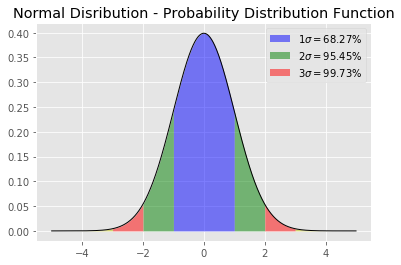

In [4]:
x = np.linspace(-5.0, 5.0, 10000)
plt.plot(x, ss.norm.pdf(x, loc=0.0, scale=1.0), 'k-', lw=1.0)

xseg = x[np.logical_and(-5.0 <= x, x <= -3.0)]
plt.fill_between(xseg, ss.norm.pdf(xseg), color='y', alpha=0.5, linewidth=0)
xseg = x[np.logical_and(-3.0 <= x, x <= -2.0)]
plt.fill_between(xseg, ss.norm.pdf(xseg), color='r', alpha=0.5, linewidth=0)
xseg = x[np.logical_and(-2.0 <= x, x <= -1.0)]
plt.fill_between(xseg, ss.norm.pdf(xseg), color='g', alpha=0.5, linewidth=0)
xseg = x[np.logical_and(-1.0 <= x, x <=  1.0)]
plt.fill_between(xseg, ss.norm.pdf(xseg), color='b', alpha=0.5, linewidth=0, label="$1 \sigma = 68.27\%$")
xseg = x[np.logical_and( 1.0 <= x, x <=  2.0)]
plt.fill_between(xseg, ss.norm.pdf(xseg), color='g', alpha=0.5, linewidth=0, label="$2 \sigma = 95.45\%$")
xseg = x[np.logical_and( 2.0 <= x, x <=  3.0)]
plt.fill_between(xseg, ss.norm.pdf(xseg), color='r', alpha=0.5, linewidth=0, label="$3 \sigma = 99.73\%$")
xseg = x[np.logical_and( 3.0 <= x, x <=  5.0)]
plt.fill_between(xseg, ss.norm.pdf(xseg), color='y', alpha=0.5, linewidth=0)

plt.title("Normal Disribution - Probability Distribution Function")
plt.legend();

### Sampling distribution

In [13]:
np.set_printoptions(formatter={'float': lambda x: "{0:6.3f}".format(x)})

sampsize = 10
nosamps = 1000 # Thus 1000 samples or 10 persons heights

samp = np.random.standard_normal((nosamps, sampsize))

print(samp)

[[-1.328 -0.736  1.993 ...  0.321 -1.214  1.014]
 [-1.023 -0.362 -0.028 ... -1.244 -1.044 -0.074]
 [-0.273  0.882  1.940 ...  0.230  1.669 -0.278]
 ...
 [-0.009  0.254  0.545 ...  1.185  0.535 -2.345]
 [ 0.462  0.441 -0.019 ... -0.065  0.370 -2.557]
 [ 0.618 -2.322 -0.960 ... -0.559 -0.599 -0.761]]


In [14]:
mean = samp.sum(axis=1) / sampsize
print(mean) # prints out all of the different means from all of the different samples

# Doing this over and over will eventually lead us back to exactly ZERO

[ 0.479 -0.178  0.184 -0.333 -0.348 -0.043  0.163 -0.295  0.205 -0.632
  0.417  0.045 -0.240 -0.081  0.191  0.357 -0.013  0.085  0.044 -0.132
  0.131 -0.104 -0.128 -0.186  0.364 -0.480 -0.080  0.745 -0.404  0.454
  0.199 -0.154  0.073  0.208 -0.473 -0.155 -0.123  0.136 -0.284 -0.153
  0.512  0.019 -0.221  0.120 -0.366  0.186 -0.353 -0.374 -0.112 -0.383
 -0.111  0.557  0.106  0.287 -0.855  0.338 -0.005  0.131 -0.533 -0.226
 -0.419  0.135  0.098 -0.271 -0.525 -0.365  0.191  0.284  0.350  0.288
 -0.455  0.300 -0.553 -0.299  0.706  0.041 -0.194  0.388 -0.363  0.080
  0.011 -0.406 -0.219 -0.048 -0.085  0.093 -0.235  0.359 -0.174 -0.285
  0.562  0.357  0.665  0.023  0.063 -0.298 -0.368 -0.605 -0.109 -0.234
  0.297 -0.069  0.386 -0.031 -0.187  0.060 -0.081 -0.245 -0.388  0.004
 -0.390 -0.222 -0.221 -0.585 -0.058 -0.508 -0.063  0.173  0.203 -0.546
  0.031  0.490 -0.246  0.296  0.069  0.253 -0.122 -0.378  0.018 -0.454
  0.046  0.083 -0.396 -0.077  0.270  0.218  0.084  0.021  0.451 -0.155
  0.41

Heres where it ties into BIAS:

If you work out a population variance. 


In [18]:
# Calculate the variance. (Square of the SD)
# Q: How do we get the variance?:
# ANS: Take the mean from each of the values then square all othe values and add them together and then 
# divide by the number of values you started with....
# BUT !! This method is biased because it typically UNDERESTIMATES the real sampling distribution variance
# LOOK:

vari = (samp - mean[:, np.newaxis])**2
vari = vari.sum(axis=1) / (sampsize)

# Without the correction.
mean_vari = vari.sum() / nosamps
print(mean_vari)

# Using Bessel's correction: https://en.wikipedia.org/wiki/Bessel%27s_correction
print(mean_vari * (sampsize / (sampsize - 1.0)))
# Our variance first output
# The variance is supposed to be 1 (second output)
# We divide by -1 to have an unbiased estimate 


0.9075135764051386
1.0083484182279319


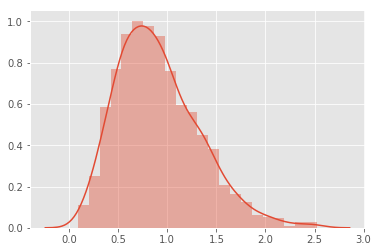

In [16]:
sns.distplot(vari)

### That's it